### Data Cleaning

#### Extracting Data from Database

In [168]:
import MySQLdb
import matplotlib.pyplot as plt

#SQL Connection 
myvars = {}
with open("divenna-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db=myvars['DB databasename'])
cursor = conn.cursor()

cursor.execute('SELECT * FROM new_cases_covid_air_pollution');
rows = cursor.fetchall()

In [169]:
import pandas as pd
data = list(rows)
poll_df = pd.DataFrame(data,columns = ['Date', 'State Name', 'New Covid Cases', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips', 'pm10_mean',
       'pm25_mean', 'co_mean', 'no2_mean', 'o3_mean', 'so2_mean', 'press_mean',
       'rh_mean', 'temp_mean', 'wind_mean', 'AQI', 'Category'])
poll_df.drop(0,axis=0,inplace =True)
poll_df.head()

,Date,State Name,New Covid Cases,Population Staying at Home,Population Not Staying at Home,Number of Trips,pm10_mean,pm25_mean,co_mean,no2_mean,o3_mean,so2_mean,press_mean,rh_mean,temp_mean,wind_mean,AQI,Category
1,2020-01-01,Alabama,0.0,739308.0,2925370.0,10534674.5,12.5,8.225961538461538,0.29569833333333334,16.373918,0.0336765,0.9058586999999999,1000.6108335,50.48055566666667,48.43555533333333,92.36388883333332,36.666666666666664,Good
2,2020-01-01,California,0.0,1348187.0,4991812.0,21435209.5,17.615384615384617,11.933323307692309,0.4088139016393443,10.150139947368421,0.0222615375,0.5703462549019608,973.4697712352942,64.12796427835052,49.71022480921053,93.80996312891986,55.35849056603774,Moderate
3,2020-01-01,Colorado,0.0,586771.0,1985137.0,8867251.375,10.25,4.7855855405405405,0.3253724375,12.381217833333332,0.03829023333333333,1.1027434375,814.8075001999999,65.33611106666666,31.374999962962963,113.99857954545455,30.51851851851852,Good
4,2020-01-01,Connecticut,0.0,249491.0,951253.0,3862217.5,5.2,3.10625,0.19342766666666666,6.553260750000001,0.0240585,0.10579716666666666,991.923611,46.104166500000005,37.482142714285715,135.21060604545454,22.166666666666668,Good
5,2020-01-01,Florida,0.0,1347774.0,5176612.0,21064386.375,19.6,13.366013058823528,0.30917433333333333,11.0879167,0.030657800000000002,1.0205663157894738,1017.4791665,67.42708350000001,61.408333400000004,102.17430566666667,46.05128205128205,Good


In [1]:
import pandas as pd
poll_df = pd.read_csv('new_cases_covid_air_pollution.csv')
poll_df.shape

(23162, 18)

In [2]:
poll_df.columns

Index(['Date', 'State Name', 'New Covid Cases', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips', 'pm10_mean',
       'pm25_mean', 'co_mean', 'no2_mean', 'o3_mean', 'so2_mean', 'press_mean',
       'rh_mean', 'temp_mean', 'wind_mean', 'AQI', 'Category'],
      dtype='object')

In [3]:
poll_df['New Covid Cases'].max()

3749.0

#### Handling Missing Values

In [4]:
#To find the number of `Nan` objects within the given series
poll_df.isna().sum()

Date                              0
State Name                        0
New Covid Cases                   0
Population Staying at Home        0
Population Not Staying at Home    0
Number of Trips                   0
pm10_mean                         0
pm25_mean                         0
co_mean                           0
no2_mean                          0
o3_mean                           0
so2_mean                          0
press_mean                        0
rh_mean                           0
temp_mean                         0
wind_mean                         0
AQI                               0
Category                          0
dtype: int64

Data frame has zero missing values

#### Handling Duplicates

In [5]:
poll_df.shape

(23162, 18)

In [6]:
poll_df.duplicated().value_counts()

False    23162
dtype: int64

In [7]:
poll_df.drop_duplicates(inplace = True)

In [8]:
poll_df.shape

(23162, 18)

There are no duplicate instances present in the dataset

#### Checking Datatypes

In [9]:
poll_df.dtypes

Date                               object
State Name                         object
New Covid Cases                   float64
Population Staying at Home        float64
Population Not Staying at Home    float64
Number of Trips                   float64
pm10_mean                         float64
pm25_mean                         float64
co_mean                           float64
no2_mean                          float64
o3_mean                           float64
so2_mean                          float64
press_mean                        float64
rh_mean                           float64
temp_mean                         float64
wind_mean                         float64
AQI                               float64
Category                           object
dtype: object

In [10]:
# converting Datatypes to its appropriate types attribute from object to Date datatype
poll_df["Date"] =  pd.to_datetime(poll_df["Date"], format="%Y/%m/%d")
columns = ['New Covid Cases', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips', 'pm10_mean',
       'pm25_mean', 'co_mean', 'no2_mean', 'o3_mean', 'so2_mean', 'press_mean',
       'rh_mean', 'temp_mean', 'wind_mean', 'AQI']
for col_name in columns:
    poll_df[col_name] = poll_df[col_name].astype(float)

In [11]:
poll_df.dtypes

Date                              datetime64[ns]
State Name                                object
New Covid Cases                          float64
Population Staying at Home               float64
Population Not Staying at Home           float64
Number of Trips                          float64
pm10_mean                                float64
pm25_mean                                float64
co_mean                                  float64
no2_mean                                 float64
o3_mean                                  float64
so2_mean                                 float64
press_mean                               float64
rh_mean                                  float64
temp_mean                                float64
wind_mean                                float64
AQI                                      float64
Category                                  object
dtype: object

All values of columns are in the right datatype

#### Fix structural errors

In [12]:
poll_df['State Name'].unique()

array(['Alabama', 'California', 'Colorado', 'Connecticut', 'Florida',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Missouri', 'Nevada', 'New Hampshire', 'New Mexico',
       'North Carolina', 'North Dakota', 'Ohio', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'Tennessee', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'Wisconsin', 'Wyoming', 'New York', 'Texas',
       'Arizona', 'New Jersey', 'Minnesota'], dtype=object)

In [13]:
poll_df['Category'].unique()

array(['Good', 'Moderate'], dtype=object)

In [14]:
poll_df['Category'].value_counts()

Good        20555
Moderate     2607
Name: Category, dtype: int64

We have seen for the categorical variables that there are no misspellings, incongruent naming conventions, improper capitalization, incorrect word use, etc.

In [15]:
try:
    pd.to_datetime(poll_df['Date'], format="%Y/%m/%d", errors='raise')
    pass
except ValueError:
    print('ValueError')

Since we don't have valueError, the Date columns values are also in the right format

#### Check for Data Outliers

Below are some of the techniques of detecting outliers

1. Boxplots
2. Z-score
3. Inter Quantile Range(IQR)

Using pandas describe() to find outliers

In [67]:
poll_df.describe()

,New Covid Cases,Population Staying at Home,Population Not Staying at Home,Number of Trips,pm10_mean,pm25_mean,co_mean,no2_mean,o3_mean,so2_mean,press_mean,rh_mean,temp_mean,wind_mean,AQI
count,23162.000000,2.316200e+04,2.316200e+04,2.316200e+04,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000
mean,1260.956826,7.171461e+05,2.855854e+06,1.273283e+07,18.712872,7.582933,0.252216,7.960636,0.030712,0.546447,960.969699,63.484517,55.093322,98.423126,37.666734
std,1366.193127,4.404834e+05,1.811446e+06,8.078836e+06,10.036519,3.513880,0.109369,4.550092,0.008788,0.348988,55.458517,18.247240,18.077966,25.966636,10.668120
min,0.000000,8.136500e+04,3.293510e+05,9.222940e+05,0.500000,-0.162500,-0.046791,-0.578261,0.002236,-0.508303,703.649999,6.983333,1.062500,10.725000,7.750000
25%,97.000000,3.007390e+05,1.113335e+06,4.912191e+06,11.428571,5.031811,0.180214,4.485172,0.024397,0.269936,941.376339,51.541667,40.980208,83.729461,30.236842
50%,667.000000,6.655610e+05,2.862146e+06,1.203795e+07,16.400000,6.980619,0.233352,7.070964,0.030369,0.517069,983.514583,65.750000,56.061236,99.420982,36.807540
75%,2179.000000,1.080642e+06,4.142804e+06,1.965616e+07,23.991767,9.580076,0.309196,10.650378,0.036747,0.783753,998.843229,77.166667,70.539081,114.966146,43.836712
max,3749.000000,2.517364e+06,8.876193e+06,4.546693e+07,52.500000,18.000000,0.651145,22.745653,0.060434,2.139130,1048.744445,100.000000,99.263889,185.888889,73.000000


In [16]:
poll_df.columns

Index(['Date', 'State Name', 'New Covid Cases', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips', 'pm10_mean',
       'pm25_mean', 'co_mean', 'no2_mean', 'o3_mean', 'so2_mean', 'press_mean',
       'rh_mean', 'temp_mean', 'wind_mean', 'AQI', 'Category'],
      dtype='object')

#### Detecting outliers using Boxplot:

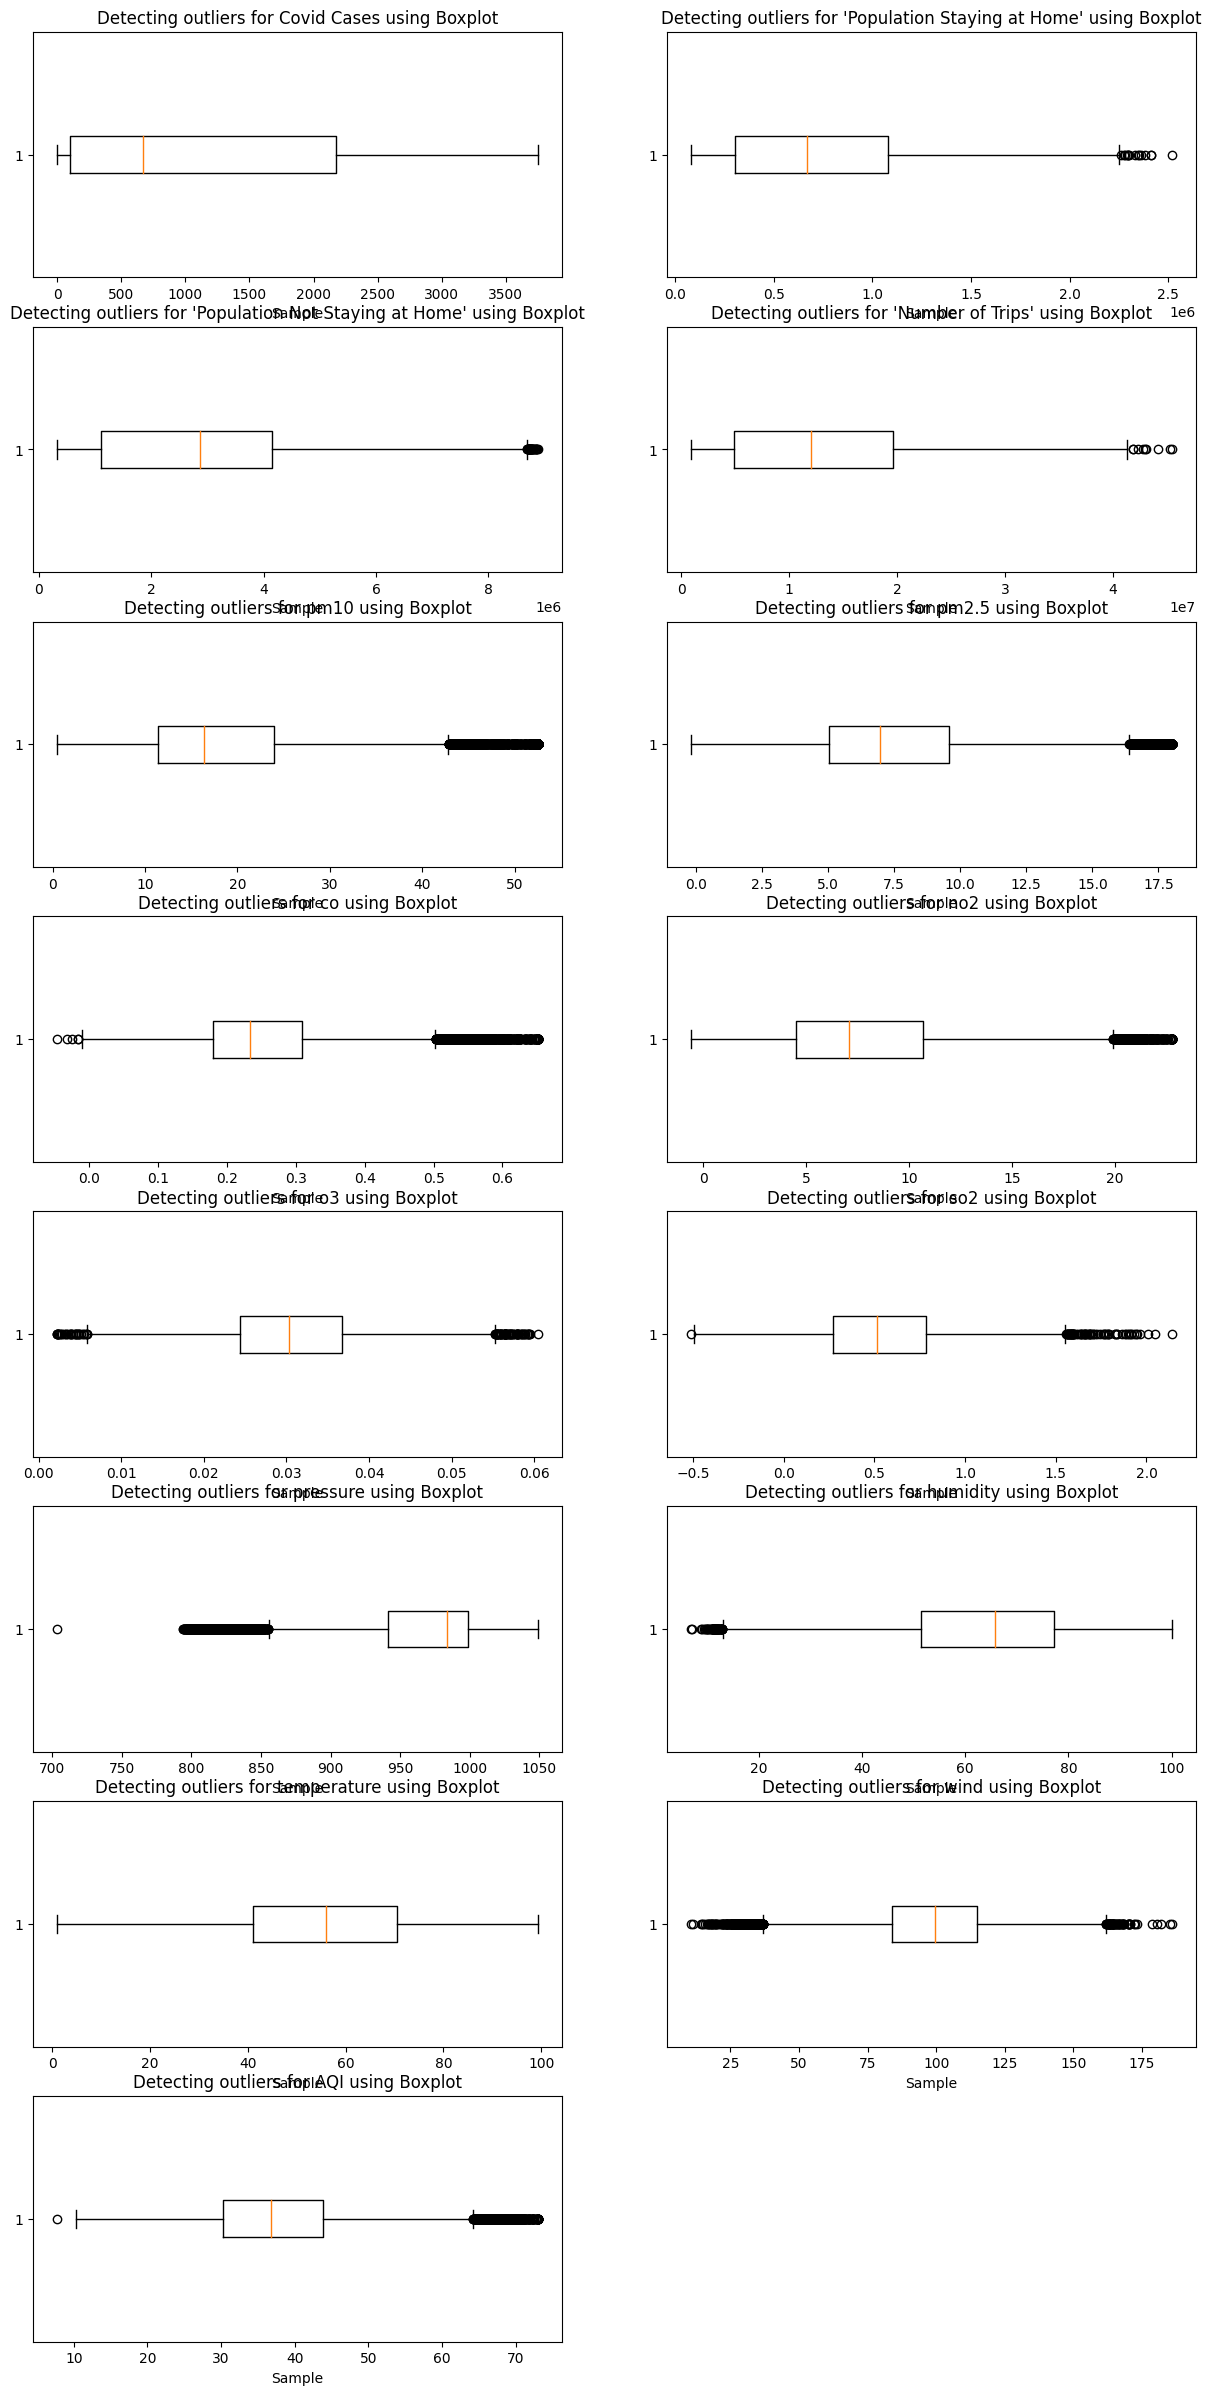

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 30))

plt.subplot(8,2, 1)
plt.boxplot(poll_df['New Covid Cases'], vert=False)
plt.title("Detecting outliers for Covid Cases using Boxplot")
plt.xlabel('Sample')


plt.subplot(8,2,2)
plt.boxplot(poll_df['Population Staying at Home'], vert=False)
plt.title("Detecting outliers for 'Population Staying at Home' using Boxplot")
plt.xlabel('Sample')



plt.subplot(8,2,3)
plt.boxplot(poll_df['Population Not Staying at Home'], vert=False)
plt.title("Detecting outliers for 'Population Not Staying at Home' using Boxplot")
plt.xlabel('Sample')


plt.subplot(8,2,4)
plt.boxplot(poll_df['Number of Trips'], vert=False)
plt.title("Detecting outliers for 'Number of Trips' using Boxplot")
plt.xlabel('Sample')


plt.subplot(8,2, 5)
plt.boxplot(poll_df['pm10_mean'], vert=False)
plt.title("Detecting outliers for pm10 using Boxplot")
plt.xlabel('Sample')


plt.subplot(8,2,6)
plt.boxplot(poll_df['pm25_mean'], vert=False)
plt.title("Detecting outliers for pm2.5 using Boxplot")
plt.xlabel('Sample')



plt.subplot(8,2,7)
plt.boxplot(poll_df['co_mean'], vert=False)
plt.title("Detecting outliers for co using Boxplot")
plt.xlabel('Sample')


plt.subplot(8,2,8)
plt.boxplot(poll_df['no2_mean'], vert=False)
plt.title("Detecting outliers for no2 using Boxplot")
plt.xlabel('Sample')


plt.subplot(8,2,9)
plt.boxplot(poll_df['o3_mean'], vert=False)
plt.title("Detecting outliers for o3 using Boxplot")
plt.xlabel('Sample')


plt.subplot(8,2,10)
plt.boxplot(poll_df['so2_mean'], vert=False)
plt.title("Detecting outliers for so2 using Boxplot")
plt.xlabel('Sample')

plt.subplot(8,2,11)
plt.boxplot(poll_df['press_mean'], vert=False)
plt.title("Detecting outliers for pressure using Boxplot")
plt.xlabel('Sample')

plt.subplot(8,2,12)
plt.boxplot(poll_df['rh_mean'], vert=False)
plt.title("Detecting outliers for humidity using Boxplot")
plt.xlabel('Sample')

plt.subplot(8,2,13)
plt.boxplot(poll_df['temp_mean'], vert=False)
plt.title("Detecting outliers for temperature using Boxplot")
plt.xlabel('Sample')

plt.subplot(8,2,14)
plt.boxplot(poll_df['wind_mean'], vert=False)
plt.title("Detecting outliers for wind using Boxplot")
plt.xlabel('Sample')

plt.subplot(8,2,15)
plt.boxplot(poll_df['AQI'], vert=False)
plt.title("Detecting outliers for AQI using Boxplot")
plt.xlabel('Sample')

plt.show()


#### Detecting outliers using IQR

Criteria: Any data point whose Z-score falls out of 3rd standard deviation is an outlier.

In [70]:
import numpy as np

def detect_outliers_iqr(data):
    outliers =[]
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers


In [71]:
column_list = ['New Covid Cases', 'Population Staying at Home',
               'Population Not Staying at Home', 'Number of Trips', 'pm10_mean',
       'pm25_mean', 'co_mean', 'no2_mean', 'o3_mean', 'so2_mean', 'press_mean',
       'rh_mean', 'temp_mean', 'wind_mean','AQI']

for column in column_list:
    print(f'The number of outliers in the {column} column in percentage:   ',(len(detect_outliers_iqr(poll_df[column]))/poll_df.shape[0])*100)

The number of outliers in the New Covid Cases column in percentage:    0.0
The number of outliers in the Population Staying at Home column in percentage:    0.06476124686987307
The number of outliers in the Population Not Staying at Home column in percentage:    0.12520507728175462
The number of outliers in the Number of Trips column in percentage:    0.03885674812192384
The number of outliers in the pm10_mean column in percentage:    3.082635351005958
The number of outliers in the pm25_mean column in percentage:    2.383213884811329
The number of outliers in the co_mean column in percentage:    3.1042224332959156
The number of outliers in the no2_mean column in percentage:    1.5456350919609705
The number of outliers in the o3_mean column in percentage:    0.4317416457991538
The number of outliers in the so2_mean column in percentage:    0.29790173560141614
The number of outliers in the press_mean column in percentage:    11.419566531387618
The number of outliers in the rh_mean column

In [72]:
poll_df.isna().sum()

Date                              0
State Name                        0
New Covid Cases                   0
Population Staying at Home        0
Population Not Staying at Home    0
Number of Trips                   0
pm10_mean                         0
pm25_mean                         0
co_mean                           0
no2_mean                          0
o3_mean                           0
so2_mean                          0
press_mean                        0
rh_mean                           0
temp_mean                         0
wind_mean                         0
AQI                               0
Category                          0
dtype: int64

In [73]:
poll_df.reset_index(inplace=True)

#### Handling Outliers using flooring and capping method

In [74]:
def flooring_capping(series):
    original_data = series
    sorted_data = sorted(series)
    q1 = np.percentile(sorted_data, 25)
    q3 = np.percentile(sorted_data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    corrected_list = []
    for i in original_data: 
        if i<lwr_bound:
            corrected_list.append(lwr_bound)
        elif i>upr_bound:
            corrected_list.append(upr_bound)
        else:
            corrected_list.append(i)
    return pd.Series(corrected_list)

In [75]:
for column in column_list:
    poll_df[column] = flooring_capping(poll_df[column])

#### Checking for outliers after handling it

In [76]:
for column in column_list:
    print(f'The number of outliers in the {column} column in percentage:   ',(len(detect_outliers_iqr(poll_df[column]))/poll_df.shape[0])*100)

The number of outliers in the New Covid Cases column in percentage:    0.0
The number of outliers in the Population Staying at Home column in percentage:    0.0
The number of outliers in the Population Not Staying at Home column in percentage:    0.0
The number of outliers in the Number of Trips column in percentage:    0.0
The number of outliers in the pm10_mean column in percentage:    0.0
The number of outliers in the pm25_mean column in percentage:    0.0
The number of outliers in the co_mean column in percentage:    0.0
The number of outliers in the no2_mean column in percentage:    0.0
The number of outliers in the o3_mean column in percentage:    0.0
The number of outliers in the so2_mean column in percentage:    0.0
The number of outliers in the press_mean column in percentage:    0.0
The number of outliers in the rh_mean column in percentage:    0.0
The number of outliers in the temp_mean column in percentage:    0.0
The number of outliers in the wind_mean column in percentage

In [77]:
poll_df.isna().sum()

index                             0
Date                              0
State Name                        0
New Covid Cases                   0
Population Staying at Home        0
Population Not Staying at Home    0
Number of Trips                   0
pm10_mean                         0
pm25_mean                         0
co_mean                           0
no2_mean                          0
o3_mean                           0
so2_mean                          0
press_mean                        0
rh_mean                           0
temp_mean                         0
wind_mean                         0
AQI                               0
Category                          0
dtype: int64

In [80]:
poll_df.drop(columns = ['index'],inplace = True)